In [4]:
from module import data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.set_theme(context='paper', palette='deep')
sns.set_style('ticks')

## Exploratory data analysis - Americas

#### 1. Sum of cases, deaths, and fatality rate of cholera in countries from the American continent

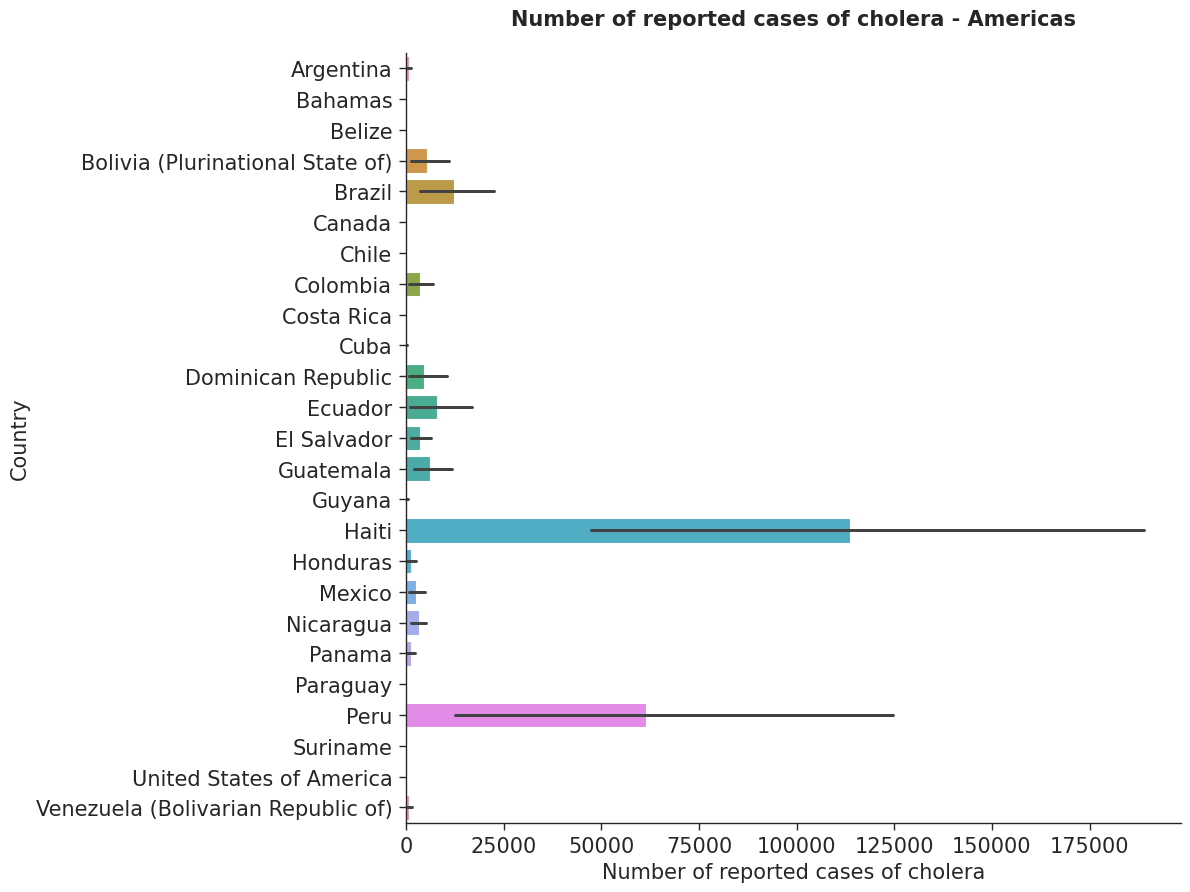

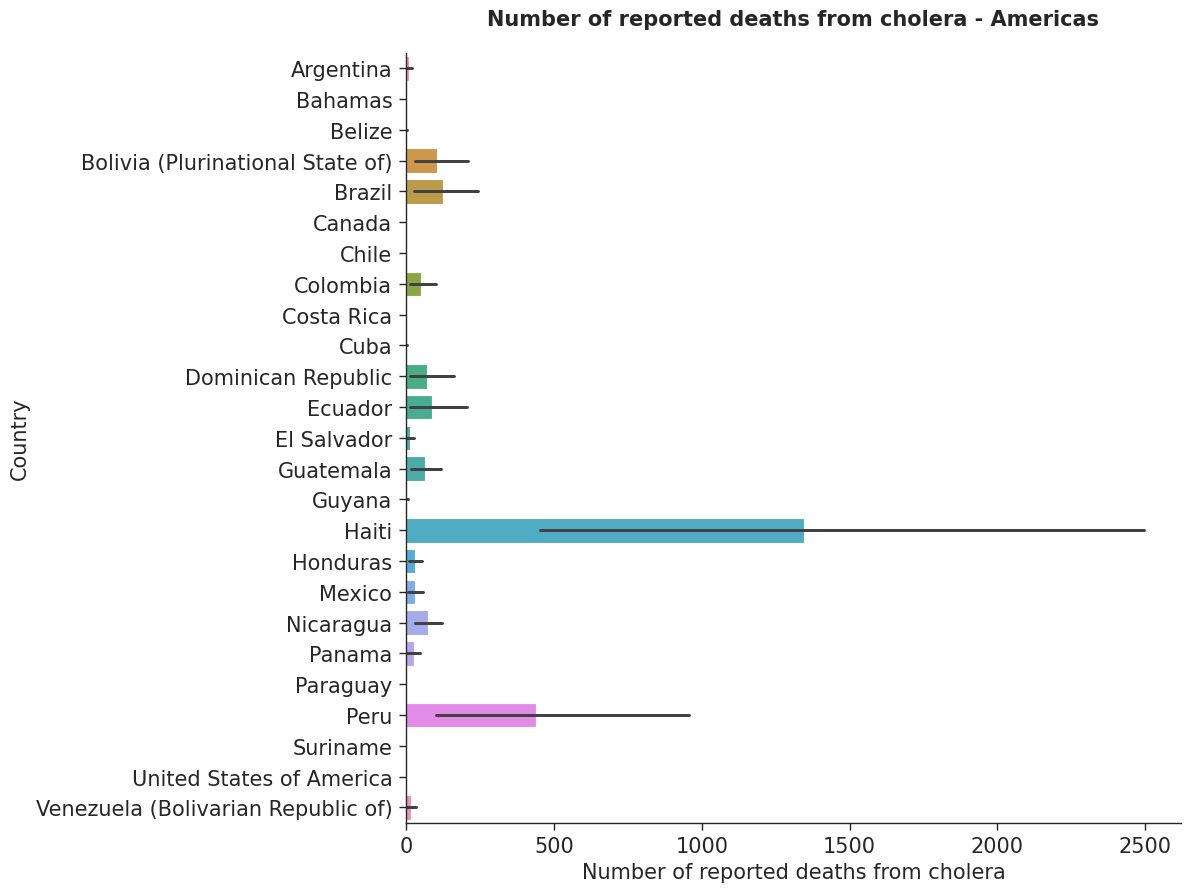

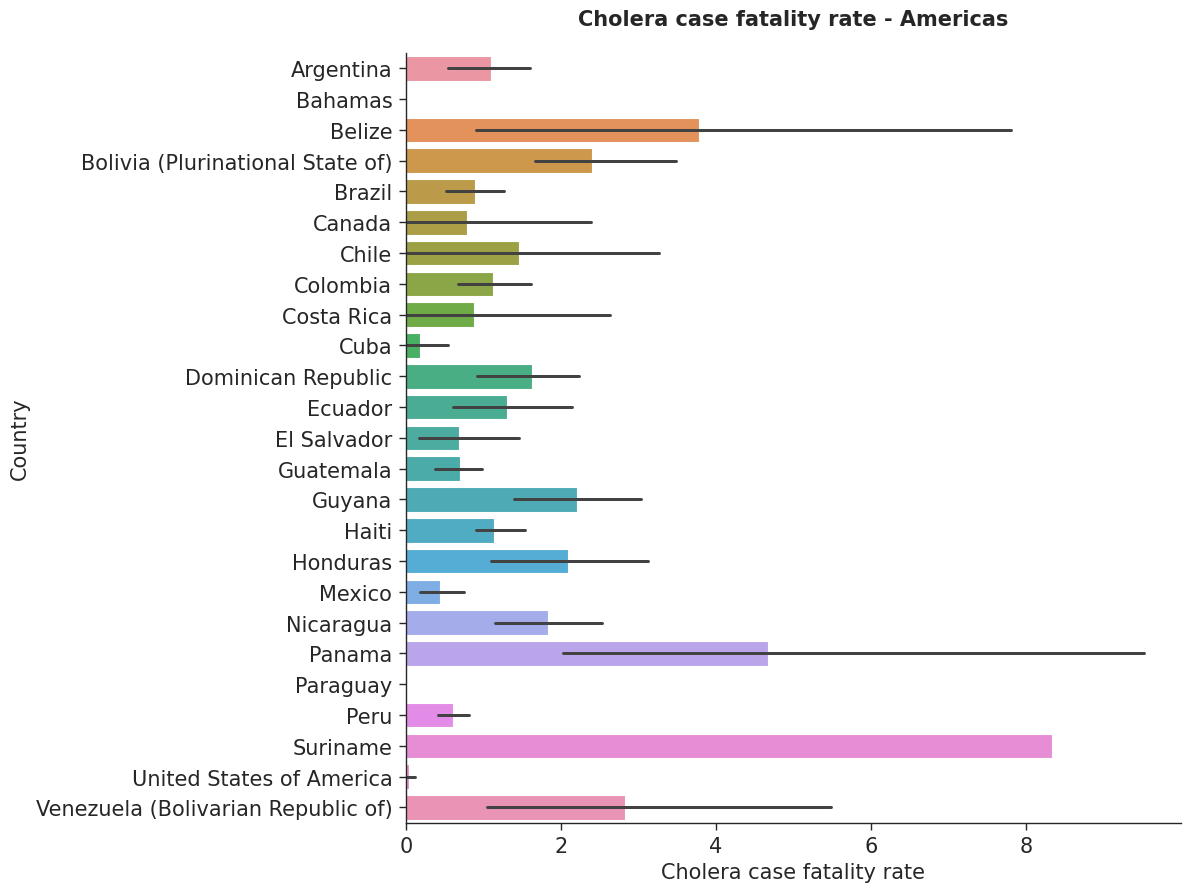

In [5]:
data_americas = data.loc[data['WHO Region']=='Americas']

for c in data.select_dtypes(include=np.number):
  if c == 'Year':
    continue
  else:    
    fig = plt.figure(figsize=(10,10))

    barplot = sns.barplot(
            data=data_americas,
            x=c,
            y='Country',
            dodge=False
        )
    
    barplot.tick_params(
            labelsize=15, 
            pad=5)
    
    sns.despine()

    plt.title(
            f'{c} - Americas',
            fontsize=15,
            fontweight='bold',
            pad = 20)

    plt.ylabel(
            'Country',
            fontsize=15
        )

    plt.xlabel(
            c,
            fontsize=15
        )

    plt.show()
    print('\n')

#### 2. Distribution of cases, deaths, and fatality rate over the years

In [6]:
for i in data_americas.select_dtypes(include=np.number):
    
    if i != 'Year':
        fig = px.scatter(
            data_frame = data_americas,
            x='Year',
            y=i,
            color='Country',
            width=800,
            title=i
        )

        fig.show()

#### 2. Number of cases and deaths per country per year

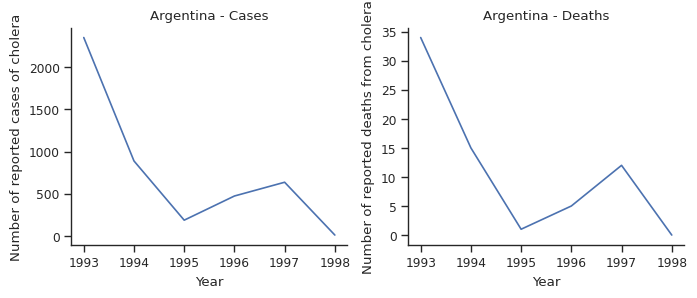

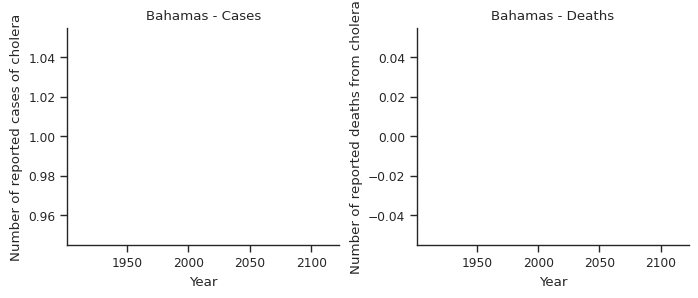

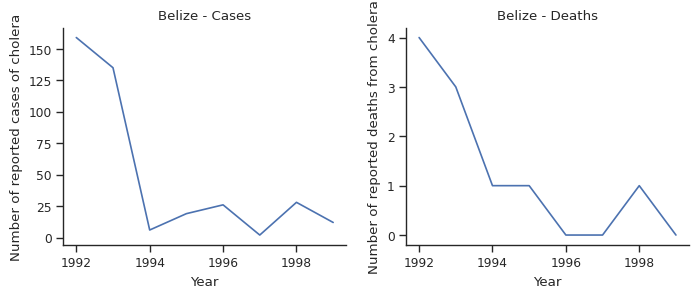

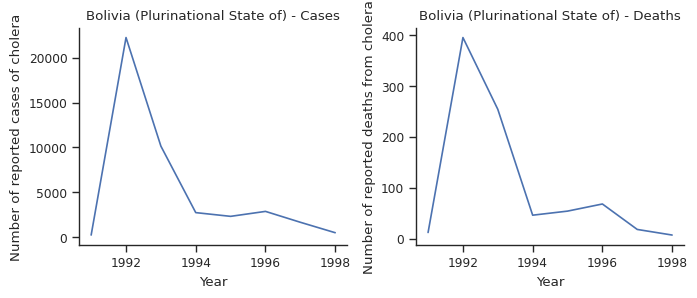

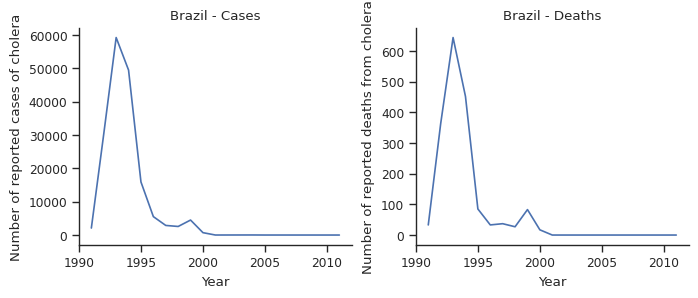

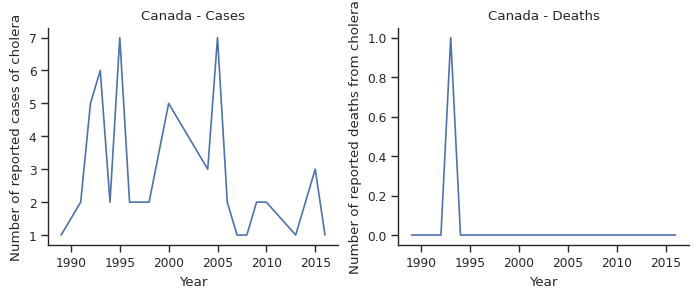

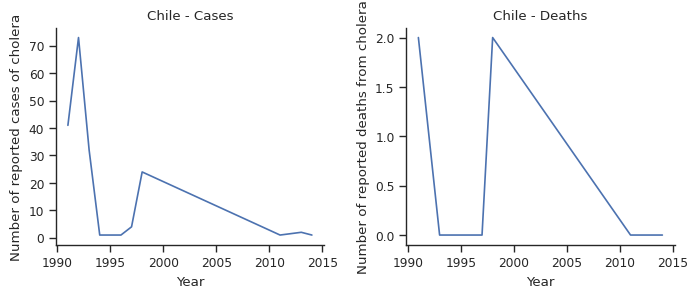

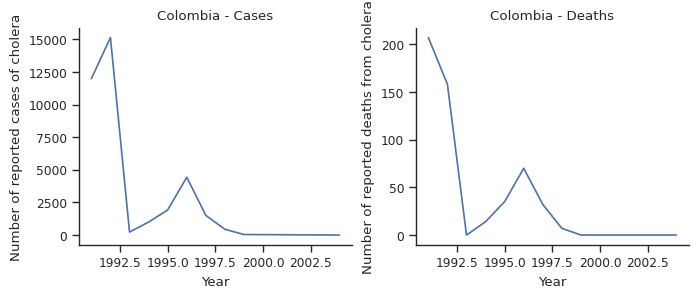

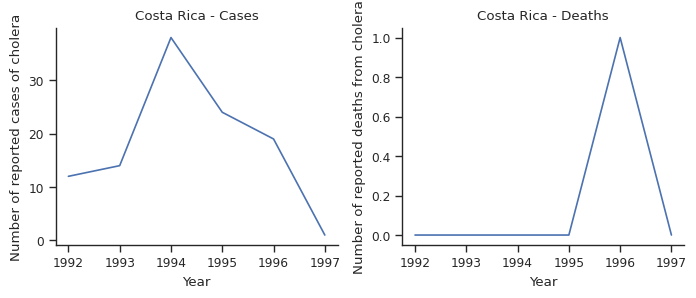

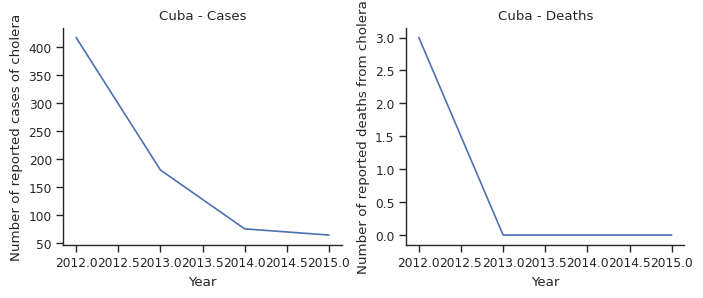

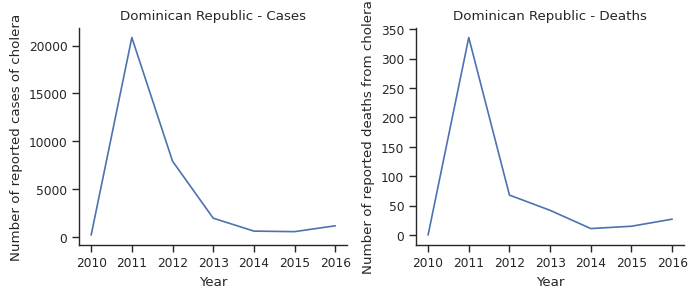

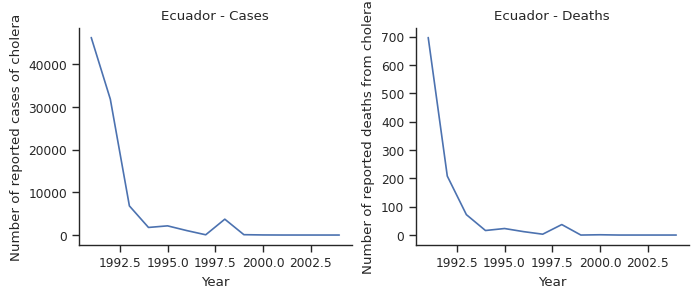

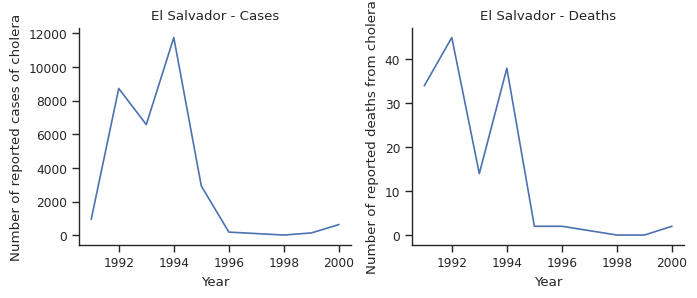

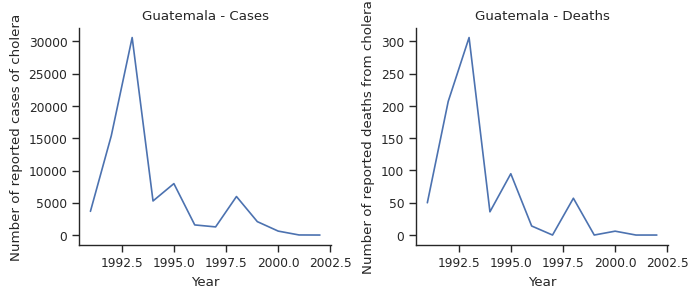

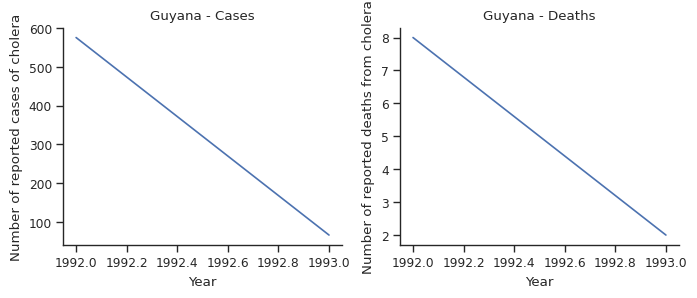

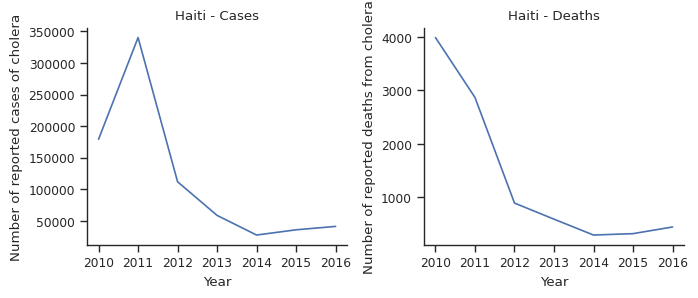

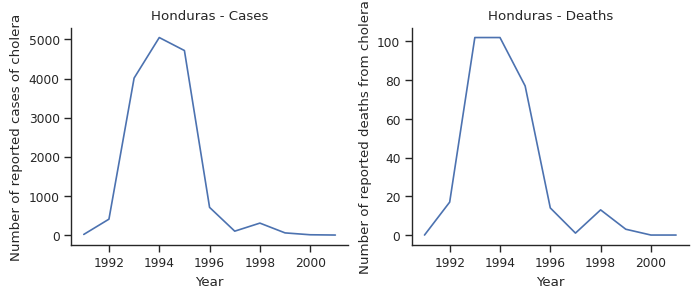

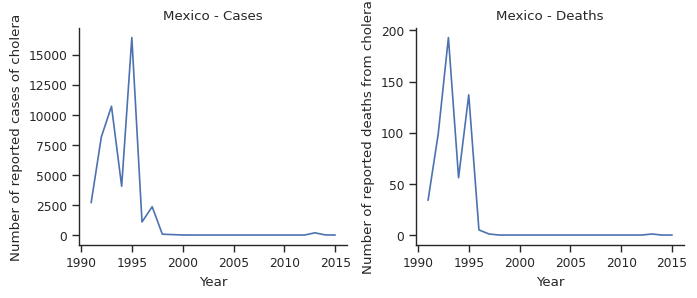

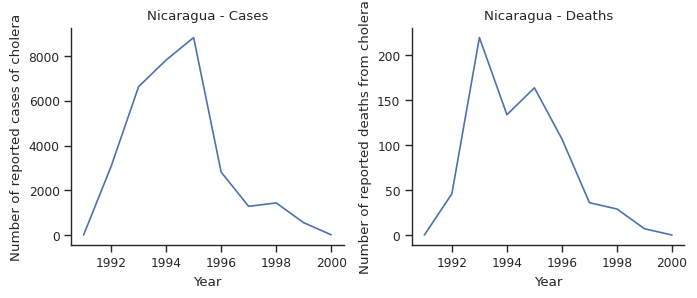

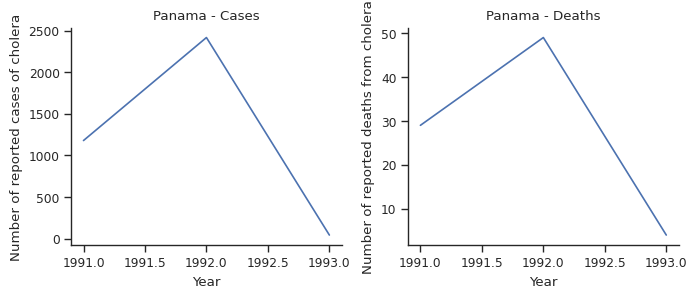

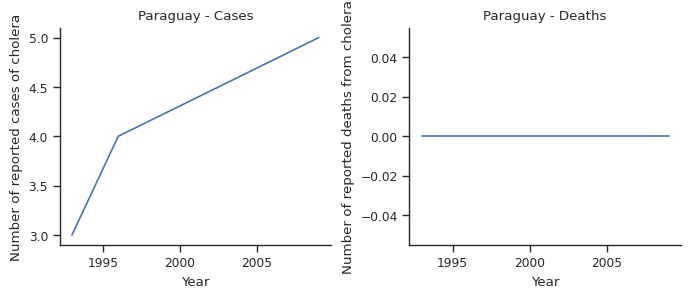

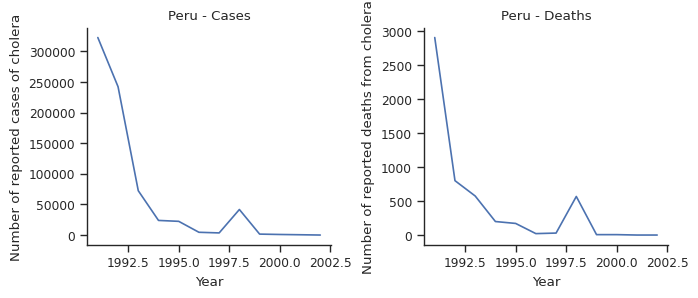

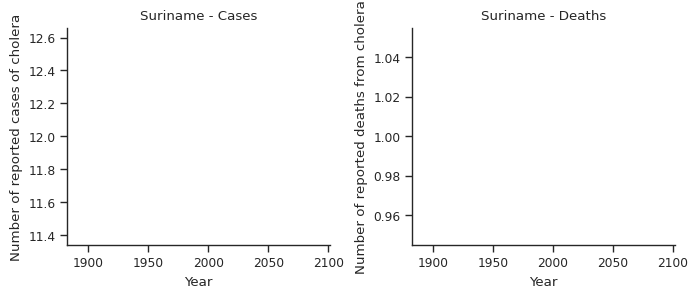

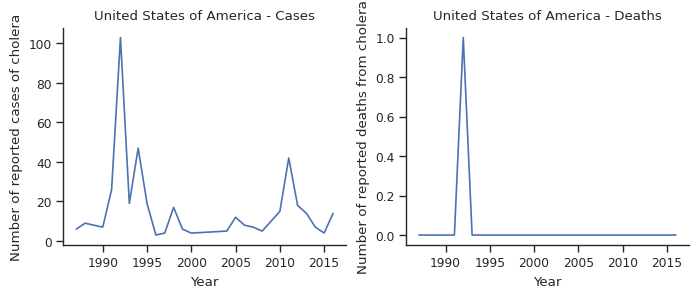

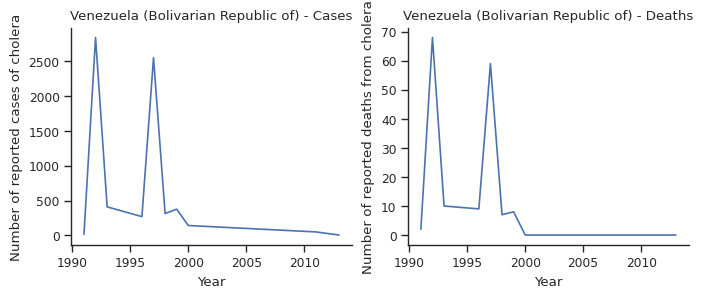

In [7]:
for i in data_americas['Country'].unique():

    fig, axes = plt.subplots(1, 2, figsize=(7,3))

    sns.lineplot(
        data=data.loc[data['Country']==i],
        x='Year',
        y='Number of reported cases of cholera',
        ax=axes[0])

    axes[0].set(
        title=f'{i} - Cases'
    )

    sns.lineplot(
        data=data.loc[data['Country']==i],
        x='Year',
        y='Number of reported deaths from cholera',
        ax=axes[1])
    
    axes[1].set(
        title=f'{i} - Deaths'
    )
    fig.tight_layout(pad=0.8)
    sns.despine()
    plt.show()

#### 3. Cases vs Deaths per country

In [8]:
for i in data_americas['Country'].unique():

    fig = px.bar(
    data_frame = data.loc[data['Country']==i], 
    x='Year', 
    y='Number of reported cases of cholera', 
    width=1000, 
    color='Number of reported deaths from cholera',
    color_discrete_sequence ='viridis',
    title=f'{i} - Cases vs Deaths')

    fig.show()

#### 3. Correlation heatmap

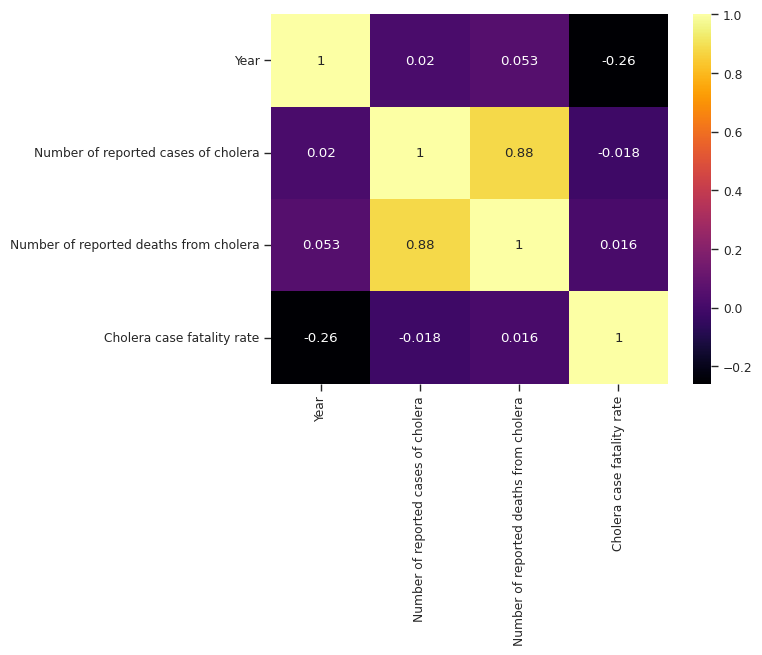

In [9]:
sns.heatmap(
    data=data_americas.corr(numeric_only=True),
    cmap='inferno',
    annot=True)

plt.show()

## Conclusions:

- Although there is no information about Haiti prior to 2010, data suggests there was a cholera outbreak these years.
- Oral vaccines for cholera were introduced in the 90's, and the overall number of cases and deaths are smaller in the years after 1994 and 1995
- However, the lack of information for some countries (such as Cuba, Paraguay, Guyana, Suriname, Panama and Haiti) are prejudicial and prevents any further conclusions about the efficacy of vaccines
- As expected, the number of cholera cases and the number of deaths are correlated. The most death reports occur in years with more cases, as shown by line and barplots
